In [1]:
#import the lib
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt



In [2]:
#kết nối tới googledrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Tìm tham số model__dropout và model__Units tối ưu

In [3]:
#đọc file csv
df = pd.read_csv('/content/drive/MyDrive/Kết Quả/VNM/Ket_Qua_Tim_Kiem_Tham_So_Model_Dropout_Model_unit_VNM_1.csv')
print(df)


    time_steps  model__units  model__dropout  batch_size  epochs          MAE
0            5            64             0.2          32      10  1671.980924
1            6           128             0.5          32      10  1612.222405
2            7           128             0.5          32      10  1795.135181
3            8           128             0.2          32      10  1567.339106
4            9           256             0.5          32      10  1540.574415
5           10           256             0.2          32      10  1951.132663
6           11           256             0.2          32      10  1615.979007
7           12           256             0.2          32      10  1493.912703
8           13           256             0.5          32      10  1972.951962
9           14            64             0.5          32      10  2116.452944
10          15           128             0.2          32      10  1670.718884
11          16           256             0.2          32      10

In [ ]:
df1 = df.copy()
df1

,time_steps,model__units,model__dropout,batch_size,epochs,MAE
0,5,64,0.2,32,10,1671.980924
1,6,128,0.5,32,10,1612.222405
2,7,128,0.5,32,10,1795.135181
3,8,128,0.2,32,10,1567.339106
4,9,256,0.5,32,10,1540.574415
5,10,256,0.2,32,10,1951.132663
6,11,256,0.2,32,10,1615.979007
7,12,256,0.2,32,10,1493.912703
8,13,256,0.5,32,10,1972.951962
9,14,64,0.5,32,10,2116.452944


In [ ]:
# mô tả dữ liệu
df1.describe()

,time_steps,model__units,model__dropout,batch_size,epochs,MAE
count,36.000000,36.000000,36.000000,36.0,36.0,36.000000
mean,22.500000,192.000000,0.275000,32.0,10.0,1615.959949
std,10.535654,79.495552,0.131747,0.0,0.0,203.788196
min,5.000000,64.000000,0.200000,32.0,10.0,1299.283465
25%,13.750000,128.000000,0.200000,32.0,10.0,1487.715654
50%,22.500000,256.000000,0.200000,32.0,10.0,1607.800147
75%,31.250000,256.000000,0.275000,32.0,10.0,1726.428841
max,40.000000,256.000000,0.500000,32.0,10.0,2116.452944


In [ ]:
#tìm bản ghi có MAE nhỏ nhất
print(df1.loc[df1['MAE'].idxmin()] )

#tìm bản ghi có MAE lớn nhất
print(df1.loc[df1['MAE'].idxmax()] )

time_steps          35.000000
model__units       256.000000
model__dropout       0.200000
batch_size          32.000000
epochs              10.000000
MAE               1299.283465
Name: 30, dtype: float64
time_steps          14.000000
model__units        64.000000
model__dropout       0.500000
batch_size          32.000000
epochs              10.000000
MAE               2116.452944
Name: 9, dtype: float64


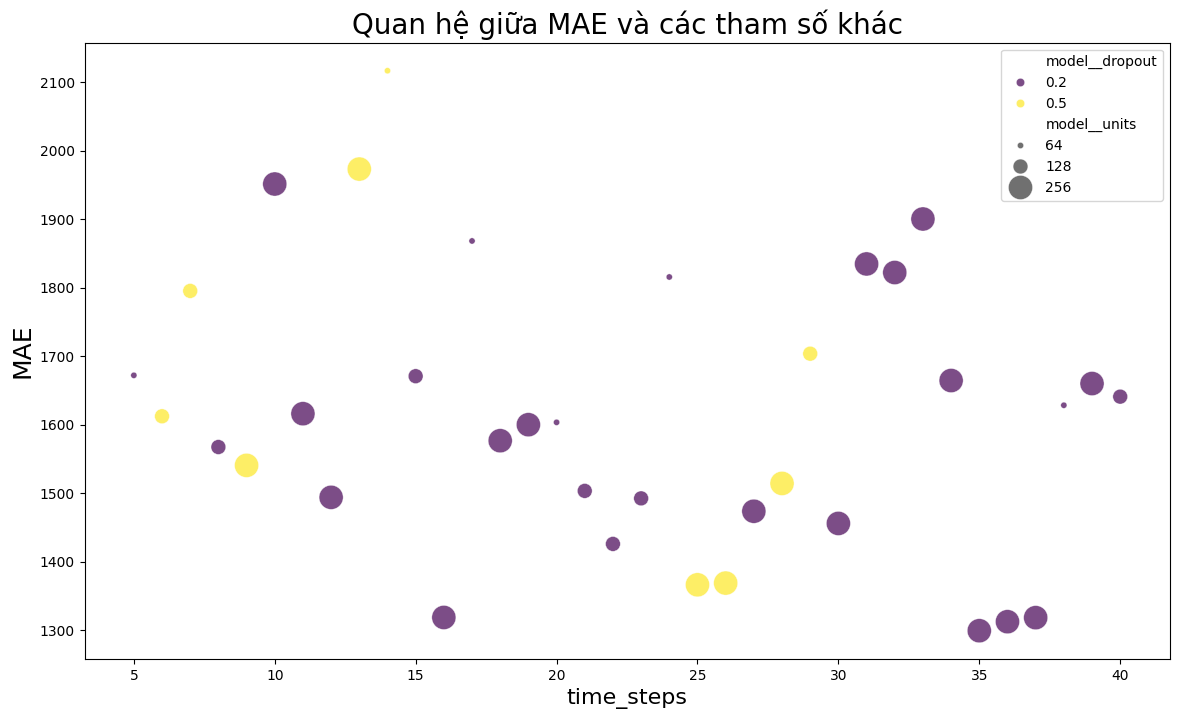

In [ ]:
# vẽ đồ thị biểu diễn mối tương quan giữa MAE và các tham số khác
# Thiết lập kích thước và tiêu đề cho biểu đồ
plt.figure(figsize=(14,8))
plt.title('Quan hệ giữa MAE và các tham số khác', fontsize=20)
plt.ylabel('MAE', fontsize=18)
plt.xlabel('time_steps', fontsize=16)

# Tạo biểu đồ scatter plot
scatter_plot = sns.scatterplot(
    x=df1['time_steps'],
    y=df1['MAE'],
    hue=df1['model__dropout'],
    size=df1['model__units'],
    palette='viridis',  # Thay đổi bảng màu, có thể dùng 'viridis', 'plasma', 'inferno', etc.
    sizes=(20, 300),    # Điều chỉnh kích thước của các điểm
    alpha=0.7           # Điều chỉnh độ trong suốt của các điểm
)

# Hiển thị biểu đồ
plt.show()


In [ ]:
# #Kết quả trên có được nhờ kỹ GridSearchCV.Khi bạn thấy 1 bộ tham số như:
# time_steps          35.000000
# model__units       256.000000
# model__dropout       0.200000
# batch_size          32.000000
# epochs              10.000000
# MAE               1299.283465
#Tức là với cùng 1 time_steps = 35,batch_size = 32,epochs = 10, Giá trị model__units,model__dropout như trên là tối ưu nhất

Nhận xét về kết quả tìm kiếm siêu tham số

Từ biểu đồ scatter plot, chúng ta có thể nhận thấy:



Quan hệ giữa model__dropout và MAE:

Các giá trị model__dropout khác nhau (biểu diễn bằng màu sắc khác nhau) cho thấy sự phân bố của MAE.
Không có sự thay đổi đáng kể trong MAE với các giá trị model__dropout khác nhau, tuy nhiên, giá trị dropout thấp hơn (màu tối hơn) có vẻ có xu hướng giảm MAE.


Quan hệ giữa model__units và MAE:

Kích thước của các điểm biểu diễn các giá trị model__units.
Các điểm lớn hơn (tương ứng với model__units cao hơn) có xu hướng có MAE thấp hơn.


Kết hợp model__dropout và model__units:

Các điểm có model__dropout thấp và model__units cao thường có MAE thấp hơn.
Đề xuất lựa chọn siêu tham số
model__dropout: Lựa chọn giá trị thấp, chẳng hạn như 0.2.
model__units: Sử dụng giá trị cao hơn, chẳng hạn như 128 hoặc 256.
Cụ thể, một mô hình với model__dropout = 0.2 và model__units = 256 có thể là lựa chọn tốt để đạt được MAE thấp hơn. Việc kiểm tra thêm các kết hợp khác nhau trong phạm vi này cũng có thể giúp tối ưu hóa mô hình hơn nữa.

# Tìm tham số batchsize tối ưu

In [ ]:
# đọc file csv
df = pd.read_csv('/content/drive/MyDrive/Kết Quả/VNM/Ket_Qua_Tim_Kiem__Tham_So_batch_size_VNM_1.csv')
print(df)

    time_steps  model__units  model__dropout  batch_size  epochs          MAE
0            5           256             0.2          16      10  1425.474256
1            6           256             0.2          64      10  1480.380357
2            7           256             0.2          16      10  1453.960498
3            8           256             0.2          16      10  1616.069756
4            9           256             0.2          16      10  1275.110771
5           10           256             0.2          16      10  1525.574227
6           11           256             0.2          32      10  1605.814779
7           12           256             0.2          16      10  1163.842878
8           13           256             0.2          32      10  2758.788803
9           14           256             0.2          32      10  1346.558987
10          15           256             0.2          16      10  2620.492440
11          16           256             0.2          16      10

In [ ]:
df.describe()

,time_steps,model__units,model__dropout,batch_size,epochs,MAE
count,46.000000,46.0,4.600000e+01,46.000000,46.0,46.000000
mean,27.500000,256.0,2.000000e-01,26.782609,10.0,1527.514231
std,13.422618,0.0,1.122491e-16,15.105427,0.0,362.272652
min,5.000000,256.0,2.000000e-01,16.000000,10.0,1095.552584
25%,16.250000,256.0,2.000000e-01,16.000000,10.0,1299.057771
50%,27.500000,256.0,2.000000e-01,16.000000,10.0,1422.695506
75%,38.750000,256.0,2.000000e-01,32.000000,10.0,1666.781865
max,50.000000,256.0,2.000000e-01,64.000000,10.0,2758.788803


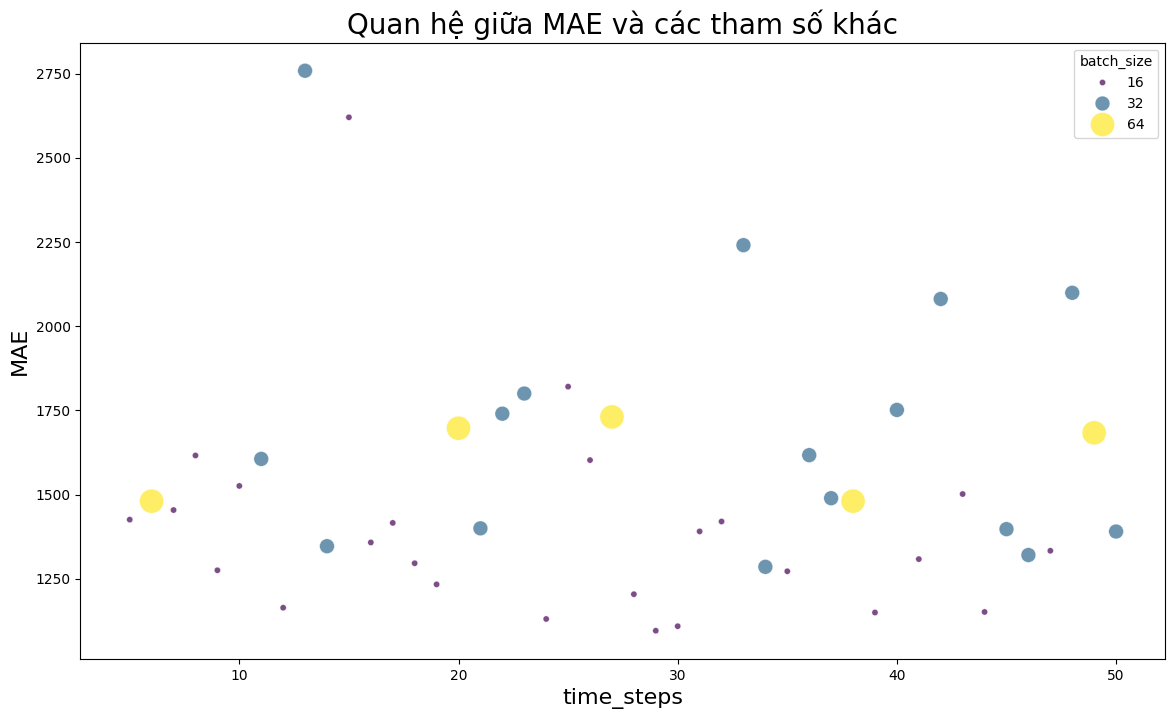

In [ ]:
#vẽ đồ thị biểu diễn sự thay đổi của mae với các tham số khác
plt.figure(figsize=(14,8))
plt.title('Quan hệ giữa MAE và các tham số khác', fontsize=20)
plt.xlabel('time_steps', fontsize=16)
plt.ylabel('MAE', fontsize=16)

# Tạo biểu đồ scatter plot
scatter_plot = sns.scatterplot(
    x=df['time_steps'],
    y=df['MAE'],
    hue=df['batch_size'],
    size=df['batch_size'],
    palette='viridis',  # Thay đổi bảng màu, có thể dùng 'viridis', 'plasma', 'inferno', etc.
    sizes=(20, 300),    # Điều chỉnh kích thước của các điểm
    alpha=0.7           # Điều chỉnh độ trong suốt của các điểm
)

# Hiển thị biểu đồ
plt.show()
#

Có thể thấy đa số các mẫu là batchsize = 16. Tại các điểm có batch_size = 16 thì giá trị MAE cũng là nhỏ nhất. Vậy nên tham số batch_size phù hợp cho bộ dữ liệu là 16

# Tìm tham số epochs tối ưu

In [4]:
# Đọc file csv
df = pd.read_csv('/content/drive/MyDrive/Kết Quả/VNM/Ket_Qua_Tim_Kiem__Tham_So_epochs_VNM_1.csv')
print(df)

   time_steps  model__units  model__dropout  batch_size  epochs          MAE
0           5           256             0.2          16      37   982.400908
1           6           256             0.2          16      21   977.078486
2           7           256             0.2          16      62  1022.981277
3           8           256             0.2          16      35   998.581184
4           9           256             0.2          16      67   925.784607
5          10           256             0.2          16      57   929.525002
6          11           256             0.2          16      56   946.671671


In [5]:
df2 = df.copy()
df2

,time_steps,model__units,model__dropout,batch_size,epochs,MAE
0,5,256,0.2,16,37,982.400908
1,6,256,0.2,16,21,977.078486
2,7,256,0.2,16,62,1022.981277
3,8,256,0.2,16,35,998.581184
4,9,256,0.2,16,67,925.784607
5,10,256,0.2,16,57,929.525002
6,11,256,0.2,16,56,946.671671


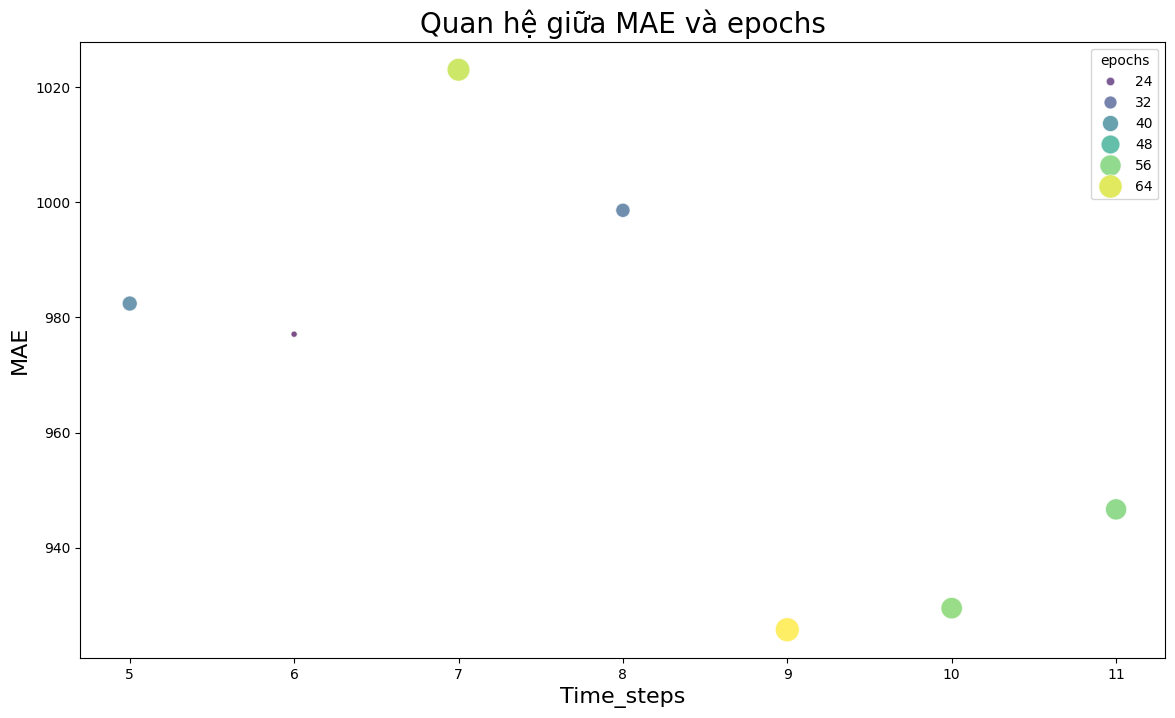

In [13]:
#vẽ đồ thị biểu diễn sự thay đổi của epochs và MAE
plt.figure(figsize=(14,8))
plt.title('Quan hệ giữa MAE và epochs', fontsize=20)
plt.xlabel('Time_steps', fontsize=16)
plt.ylabel('MAE', fontsize=16)



scatter_plot = sns.scatterplot(
    x=df2['time_steps'],
    y=df2['MAE'],
    hue=df2['epochs'],
    size=df2['epochs'],
    palette='viridis',  # Thay đổi bảng màu, có thể dùng 'viridis', 'plasma', 'inferno', etc.
    sizes=(20, 300),    # Điều chỉnh kích thước của các điểm
    alpha=0.7           # Điều chỉnh độ trong suốt của các điểm
)
plt.show()






# Hiển thị biểu đồ
plt.show()


Do hạn chế về thời gian mẫu chỉ có 7 phần tử.Nhưng từ ta có thể dùng bộ tham số tối ưu nhất ở thời điểm hiện tại là :time_steps = 9 ,model_units = 256,model_dropout = 0.2,batch_size = 16,epochs = 64

#